In [1]:
import os
import pandas as pd
import numpy as np
from scipy.stats import rankdata


datapath = "../data"
outpath = "../output"

In [2]:
df = pd.read_csv(os.path.join(outpath, "results", "allpreds.csv"), low_memory=False)
cols_to_discard = ["entry_rb", "entry_amine", "entry_pbf", "entry_glob"]
cols_to_keep = [c for c in df.columns.tolist() if c not in cols_to_discard]
df = df[cols_to_keep]

In [3]:
df.columns

Index(['name', 'smiles', 'indication', 'sarathy2016', 'janardhan2016',
       'radchenko2023', 'lepori2025_mtb', 'lepori2025_msm', 'mycpermcheck',
       'valitalo2016', 'entry_score', 'clogp'],
      dtype='object')

In [4]:
higher = {
    'sarathy2016': True,
    'janardhan2016': True,
    'radchenko2023': True,
    'lepori2025_mtb': True,
    'lepori2025_msm': True,
    'mycpermcheck': True,
    'valitalo2016': True,
    'clogp': True,
    "entry_score": True
}


ranks = {}

for k,v in higher.items():
    if v:
        r = rankdata(df[k], method="min")
        ranks[k] = r/np.max(r)
    else:
        r = rankdata(-df[k], method="min")
        ranks[k] = r/np.max(r)

In [5]:
dr = pd.DataFrame(ranks)
dr = pd.concat([df[["name", "indication"]], dr], axis=1)

def rank_drugs(df):
    columns = list(df.columns)[2:]
    rank = rankdata(np.average(df[columns], axis=1))
    rank = rank/np.max(rank)
    df["rank"] = rank
    return df

dr = rank_drugs(dr)
dr

,name,indication,sarathy2016,janardhan2016,radchenko2023,lepori2025_mtb,lepori2025_msm,mycpermcheck,valitalo2016,clogp,entry_score,rank
0,abacavir,arv,0.616,0.048387,0.240,1.000,0.984,0.720,0.576,0.336,0.629032,0.760
1,amprenavir,arv,0.272,0.572581,0.456,0.592,0.624,0.120,0.360,0.600,0.088710,0.288
2,atazanavir,arv,0.088,0.846774,0.736,0.608,0.528,0.416,0.728,0.920,0.088710,0.656
3,cabotegravir,arv,0.448,0.919355,0.608,0.568,0.448,0.288,0.304,0.400,0.629032,0.512
4,darunavir,arv,0.224,0.637097,0.528,0.648,0.632,0.088,0.336,0.608,0.354839,0.368
...,...,...,...,...,...,...,...,...,...,...,...,...
120,Sutezolid,mtb,0.696,0.725806,0.592,0.856,0.952,0.640,0.384,0.592,0.629032,0.992
121,Tedizolid,mtb,0.440,0.879032,0.656,0.544,0.536,0.152,0.824,0.312,0.629032,0.664
122,Terizidone,mtb,0.480,0.427419,0.424,0.232,0.232,0.880,0.440,0.328,0.629032,0.376
123,Thioacetazone,mtb,0.792,0.217742,0.672,0.688,0.960,1.000,0.344,0.440,0.629032,0.944


In [6]:
ds = []
for i in ["mtb", "arv", "coad"]:
    ds_ = dr[dr["indication"] == i]
    ds_ = ds_.sort_values(by="rank", ascending=False)
    ds += [ds_]

In [7]:
ds = pd.concat(ds).reset_index(drop=True)
ds

,name,indication,sarathy2016,janardhan2016,radchenko2023,lepori2025_mtb,lepori2025_msm,mycpermcheck,valitalo2016,clogp,entry_score,rank
0,Clofazimine,mtb,0.032,0.782258,1.000,0.824,0.808,0.984,0.928,1.000,0.629032,1.000
1,Sutezolid,mtb,0.696,0.725806,0.592,0.856,0.952,0.640,0.384,0.592,0.629032,0.992
2,Moxifloxacin,mtb,0.280,0.975806,0.624,0.664,0.696,0.808,0.752,0.528,0.629032,0.984
3,Prothionamide,mtb,0.912,0.322581,0.504,0.472,0.504,0.968,0.952,0.568,0.629032,0.976
4,Linezolid,mtb,0.760,0.814516,0.552,0.712,0.824,0.584,0.368,0.512,0.629032,0.960
...,...,...,...,...,...,...,...,...,...,...,...,...
120,Penicillin-V,coad,0.544,0.693548,0.256,0.184,0.056,0.232,0.096,0.480,0.354839,0.072
121,Cefazolin,coad,0.592,0.798387,0.480,0.208,0.184,0.344,0.088,0.136,0.008065,0.064
122,Perindopril Erbumine,coad,0.768,0.766129,0.192,0.064,0.024,0.064,0.208,0.624,0.088710,0.048
123,Lisinopril,coad,0.704,0.830645,0.144,0.032,0.112,0.040,0.152,0.088,0.629032,0.040


In [8]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV()
X = np.array(ds[list(ds.columns)[2:-1]])
y = np.zeros(ds.shape[0])
for i, v in enumerate(list(ds["indication"])):
    if v == "mtb":
        y[i] = 1
r = np.array(ds["rank"])
mask = np.logical_and(r < 0.2, y == 1)
clf.fit(X[~mask], y[~mask])

LogisticRegressionCV()

In [9]:
mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [10]:
ds["calib"] = clf.predict_proba(X)[:,1]
ds.to_csv(os.path.join(outpath, "results", "calibrated_scores.csv"), index=False)

/tmp/ipykernel_3131282/929252048.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="indication", y="calib", data=ds, order=["arv", "coad", "mtb"], palette=palette, ax=ax)
/home/gturon/miniconda3/envs/chem/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/gturon/miniconda3/envs/chem/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


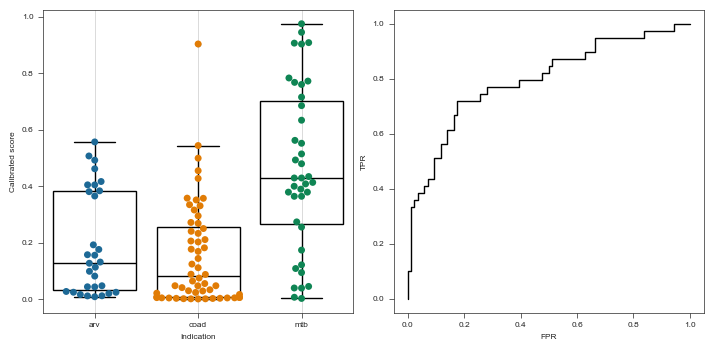

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import stylia
from stylia import NamedColors

colors=NamedColors()

color_dict ={"arv": colors.blue,
             "coad": colors.orange,
             "mtb": colors.green}

palette = {
        "arv": colors.blue,
        "coad": colors.orange,
        "mtb": colors.green
    }

fig, axs = stylia.create_figure(1,2)
ax = axs.next()
sns.swarmplot(x="indication", y="calib", data=ds, order=["arv", "coad", "mtb"], palette=palette, ax=ax)
PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}
sns.boxplot(x="indication", y="calib", data=ds, order=["arv", "coad", "mtb"], ax=ax, color="white", linewidth=1, **PROPS)
ax.grid()
ax.set_xlabel("Indication")
ax.set_ylabel("Calibrated score")
ax.set_title("")

ax = axs.next()
fpr, tpr, _ = roc_curve(y, list(ds["calib"]))
ax.plot(fpr, tpr, lw=1, color="black")
ax.grid()
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.set_title("")

plt.tight_layout()

stylia.save_figure(os.path.join(outpath, "plots", "calibration_mtb_likness.png"))

In [12]:
def tail(df, indication, n=10):
    df_ = df[df["indication"] == indication]
    df_ = df_.sort_values(by="calib")
    df_ = df_.drop(columns=["smiles"])
    return df_.head(n).reset_index(drop=True)

def head(df, indication, n=10):
    df_ = df[df["indication"] == indication]
    df_ = df_.sort_values(by="calib", ascending=False)
    df_ = df_.drop(columns=["smiles"])
    return df_.head(n).reset_index(drop=True)

calib = {}
for r in ds[["name", "calib"]].values:
    calib[r[0]] = r[1]
    
calibs = []
for n in list(df["name"]):
    calibs += [calib[n]]

df["calib"] = calibs
df.to_csv(os.path.join(outpath, "results", "mtb_likeness_calibrated_scores.csv"), index=False)

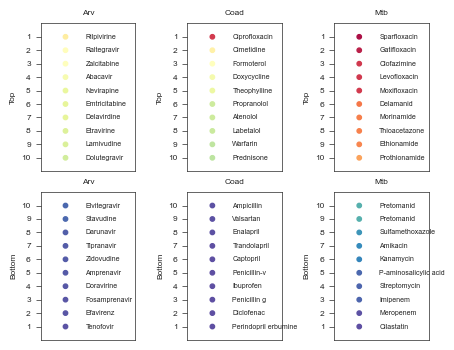

In [13]:
def selection_plot(ax, df, indication, n, is_head):
    if is_head:
        df = head(df, indication, n)
        label = "Top"
        ylim = (10, -1)
    else:
        df = tail(df, indication, n)
        label = "Bottom"
        ylim = (-1, 10)
    df_ = df[df["indication"] == indication][["name", "calib"]]
    values = list(df_["calib"])
    x = [0.6]*len(values)
    y = [i for i in range(len(values))]
    ax.scatter(x, y, c=[-v for v in values], cmap="Spectral", vmin=-1, vmax=0)
    names = list(df_["name"])
    for i, n in enumerate(names):
        ax.text(1, i, n.capitalize(), va="center")
    ax.set_yticks(y)
    ax.set_yticklabels([i+1 for i in y])
    ax.set_xlim(0.1,2)
    ax.set_ylim(ylim[0],ylim[1])
    ax.set_ylabel(label)
    ax.set_xticks([])
    ax.set_title(indication.capitalize())
    ax.set_xlabel("")
    ax.grid(False)
    return ax

fig, axs = stylia.create_figure(2,3, width=stylia.ONE_COLUMN_WIDTH*1.3)

ax = axs.next()
selection_plot(ax, df, "arv", 10, True)
ax = axs.next()
selection_plot(ax, df, "coad", 10, True)
ax = axs.next()
selection_plot(ax, df, "mtb", 10, True)

ax = axs.next()
selection_plot(ax, df, "arv", 10, False)
ax = axs.next()
selection_plot(ax, df, "coad", 10, False)
ax = axs.next()
selection_plot(ax, df, "mtb", 10, False)

plt.tight_layout()

stylia.save_figure(os.path.join(outpath, "plots", "selected_drugs_mtb_likness.png"))

In [14]:
#analysis

df = pd.read_csv(os.path.join(outpath, "results", "mtb_likeness_calibrated_scores.csv"))

In [15]:
df[df["name"]=="Beclomethasone"]

,name,smiles,indication,sarathy2016,janardhan2016,radchenko2023,lepori2025_mtb,lepori2025_msm,mycpermcheck,valitalo2016,entry_score,clogp,calib
46,Beclomethasone,CCC(=O)OCC(=O)[C@@]1(OC(=O)CC)[C@@H](C)C[C@H]2...,coad,0.404818,0.800791,0.53326,0.573316,0.625677,0.234875,0.641641,1.0,3.258979,0.268717


In [16]:
df[df["name"]=="Enalapril"]

,name,smiles,indication,sarathy2016,janardhan2016,radchenko2023,lepori2025_mtb,lepori2025_msm,mycpermcheck,valitalo2016,entry_score,clogp,calib
75,Enalapril,CCOC(=O)[C@H](CCc1ccccc1)N[C@@H](C)C(=O)N1CCC[...,coad,0.569495,0.819298,0.120729,0.25264,0.351137,0.100534,0.43857,2.0,1.903696,0.004445


In [17]:
df[df["name"]=="Irbesartan"]

,name,smiles,indication,sarathy2016,janardhan2016,radchenko2023,lepori2025_mtb,lepori2025_msm,mycpermcheck,valitalo2016,entry_score,clogp,calib
53,Irbesartan,CCCCC1=NC2(CCCC2)C(=O)N1Cc1ccc(-c2ccccc2-c2nn[...,coad,0.061284,0.352031,0.717619,0.539155,0.613559,0.175148,0.709608,1.0,3.773601,0.088587


In [18]:
df[df["name"]=="Penicillin G"]

,name,smiles,indication,sarathy2016,janardhan2016,radchenko2023,lepori2025_mtb,lepori2025_msm,mycpermcheck,valitalo2016,entry_score,clogp,calib
32,Penicillin G,CC1(C)S[C@@H]2[C@H](NC(=O)Cc3ccccc3)C(=O)N2[C@...,coad,0.365449,0.559854,0.080922,0.486483,0.458377,0.061108,0.266013,3.0,1.586347,0.001525


In [19]:
df[df["name"]=="Penicillin-V"]

,name,smiles,indication,sarathy2016,janardhan2016,radchenko2023,lepori2025_mtb,lepori2025_msm,mycpermcheck,valitalo2016,entry_score,clogp,calib
36,Penicillin-V,CC1(C)S[C@@H]2[C@H](NC(=O)COc3ccccc3)C(=O)N2[C...,coad,0.390354,0.643954,0.136159,0.371387,0.352821,0.104219,0.257802,2.0,1.401517,0.002748


In [22]:
df[df["name"]=="Quinapril"]

,name,smiles,indication,sarathy2016,janardhan2016,radchenko2023,lepori2025_mtb,lepori2025_msm,mycpermcheck,valitalo2016,entry_score,clogp,calib
55,Quinapril,CCOC(=O)[C@H](CCc1ccccc1)N[C@@H](C)C(=O)N1Cc2c...,coad,0.267763,0.845022,0.207201,0.279697,0.45254,0.103402,0.480387,1.0,3.275545,0.005001


In [23]:
df[df["name"]=="Spironolactone"]

,name,smiles,indication,sarathy2016,janardhan2016,radchenko2023,lepori2025_mtb,lepori2025_msm,mycpermcheck,valitalo2016,entry_score,clogp,calib
61,Spironolactone,CC(=O)S[C@@H]1CC2=CC(=O)CC[C@]2(C)[C@H]2CC[C@@...,coad,0.26464,0.557118,0.491491,0.834009,0.780218,0.101653,0.740807,2.0,2.912734,0.250485


In [24]:
df[df["name"]=="Canrenone"]

,name,smiles,indication,sarathy2016,janardhan2016,radchenko2023,lepori2025_mtb,lepori2025_msm,mycpermcheck,valitalo2016,entry_score,clogp,calib
81,Canrenone,C[C@]12CCC(=O)C=C1C=C[C@@H]1[C@@H]2CC[C@@]2(C)...,coad,0.40387,0.533722,0.453329,0.815008,0.758841,0.119465,0.780274,3.0,2.797227,0.316127


In [27]:
df[df["name"]=="Amlodipin"]

,name,smiles,indication,sarathy2016,janardhan2016,radchenko2023,lepori2025_mtb,lepori2025_msm,mycpermcheck,valitalo2016,entry_score,clogp,calib
48,Amlodipin,CCOC(=O)C1=C(COCCN)NC(C)=C(C(=O)OC)C1c1ccccc1Cl,coad,0.292661,0.928552,0.444576,0.267754,0.464473,0.323548,0.488277,1.0,3.580716,0.075146


In [28]:
df[df["name"]=="Atenolol"]

,name,smiles,indication,sarathy2016,janardhan2016,radchenko2023,lepori2025_mtb,lepori2025_msm,mycpermcheck,valitalo2016,entry_score,clogp,calib
74,Atenolol,CC(C)NCC(O)COc1ccc(CC(N)=O)cc1,coad,0.710201,0.426039,0.08017,0.859528,0.888283,0.313998,0.568403,2.0,0.725306,0.357518


In [29]:
df[df["name"]=="Cefazolin"]

,name,smiles,indication,sarathy2016,janardhan2016,radchenko2023,lepori2025_mtb,lepori2025_msm,mycpermcheck,valitalo2016,entry_score,clogp,calib
52,Cefazolin,Cc1nnc(SCC2=C(C(=O)O)N3C(=O)[C@@H](NC(=O)Cn4cn...,coad,0.430227,0.761719,0.255994,0.386365,0.455255,0.150951,0.257421,0.0,-0.703088,0.047886


In [30]:
df[df["name"]=="Fluticasone"]

,name,smiles,indication,sarathy2016,janardhan2016,radchenko2023,lepori2025_mtb,lepori2025_msm,mycpermcheck,valitalo2016,entry_score,clogp,calib
51,Fluticasone,C[C@@H]1C[C@H]2[C@@H]3C[C@H](F)C4=CC(=O)C=C[C@...,coad,0.395074,0.628969,0.205192,0.674014,0.642339,0.19198,0.600093,2.0,2.97482,0.055575


In [31]:
df[df["name"]=="Hydrocortisone"]

,name,smiles,indication,sarathy2016,janardhan2016,radchenko2023,lepori2025_mtb,lepori2025_msm,mycpermcheck,valitalo2016,entry_score,clogp,calib
70,Hydrocortisone,C[C@]12CCC(=O)C=C1CC[C@@H]1[C@@H]2[C@@H](O)C[C...,coad,0.58345,0.451582,0.159299,0.84272,0.810343,0.145113,0.669199,3.0,1.11653,0.240723


In [32]:
df[df["name"]=="Theophylline"]

,name,smiles,indication,sarathy2016,janardhan2016,radchenko2023,lepori2025_mtb,lepori2025_msm,mycpermcheck,valitalo2016,entry_score,clogp,calib
72,Theophylline,Cn1c(=O)c2[nH]cnc2n(C)c1=O,coad,0.907802,0.427138,0.176108,0.503596,0.528853,0.342548,0.579356,3.0,-0.817018,0.427978
